In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('C:\\Users\\ravi\\Desktop\\predective_cubic\\cubic_z.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
df = df.drop('Unnamed: 0',axis=1)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
df.shape

(26967, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [16]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

CUT :  5
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64


*******************************************************


COLOR :  7
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64


*******************************************************


CLARITY :  8
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64


*******************************************************




In [17]:
df["cut"] = df["cut"].replace(["Ideal", "Premium", "Very Good", "Good", "Fair"], [5, 4, 3, 2, 1])

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [20]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [21]:
(df.isnull().sum() / df.shape[0] * 100)[df.isnull().sum() > 0]

depth    2.58464
dtype: float64

<AxesSubplot:>

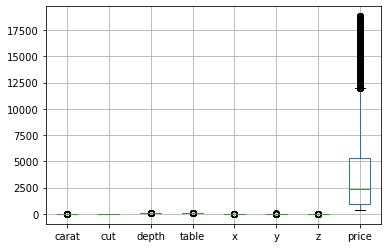

In [23]:
df.boxplot()

In [26]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

<AxesSubplot:xlabel='carat', ylabel='Density'>

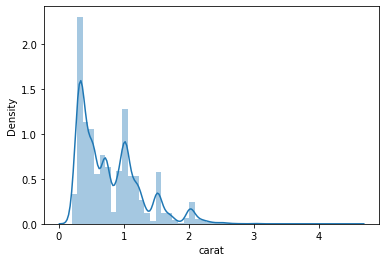

In [27]:
sns.distplot(df.carat)

<AxesSubplot:xlabel='cut', ylabel='Density'>

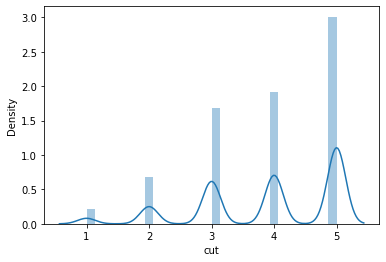

In [28]:
sns.distplot(df.cut)

<AxesSubplot:xlabel='price', ylabel='Density'>

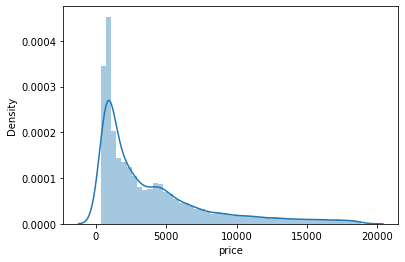

In [31]:
sns.distplot(df.price)

In [33]:
df.loc[df['depth'].isnull()==True,'depth']=61.80

<AxesSubplot:xlabel='depth', ylabel='Density'>

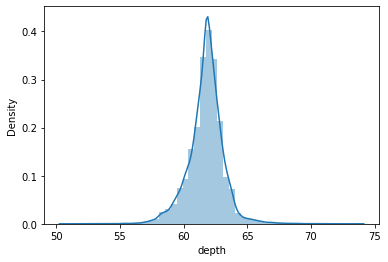

In [34]:
sns.distplot(df.depth)

In [62]:
corr = df.corr()

<AxesSubplot:>

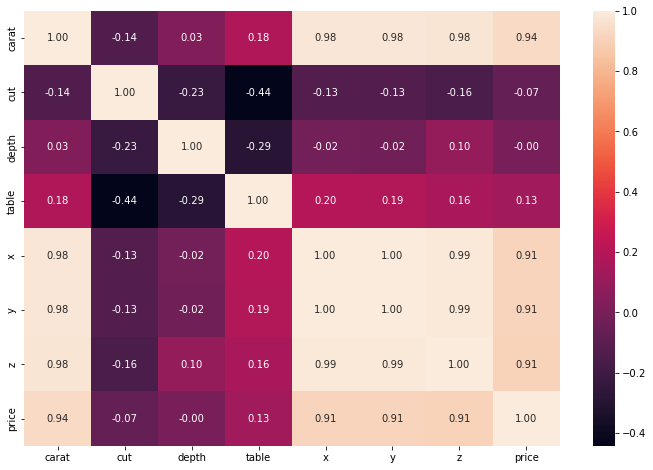

In [64]:
plt.subplots(figsize=(12,8))
sns.heatmap(corr, annot=True,fmt='.2f')

In [35]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

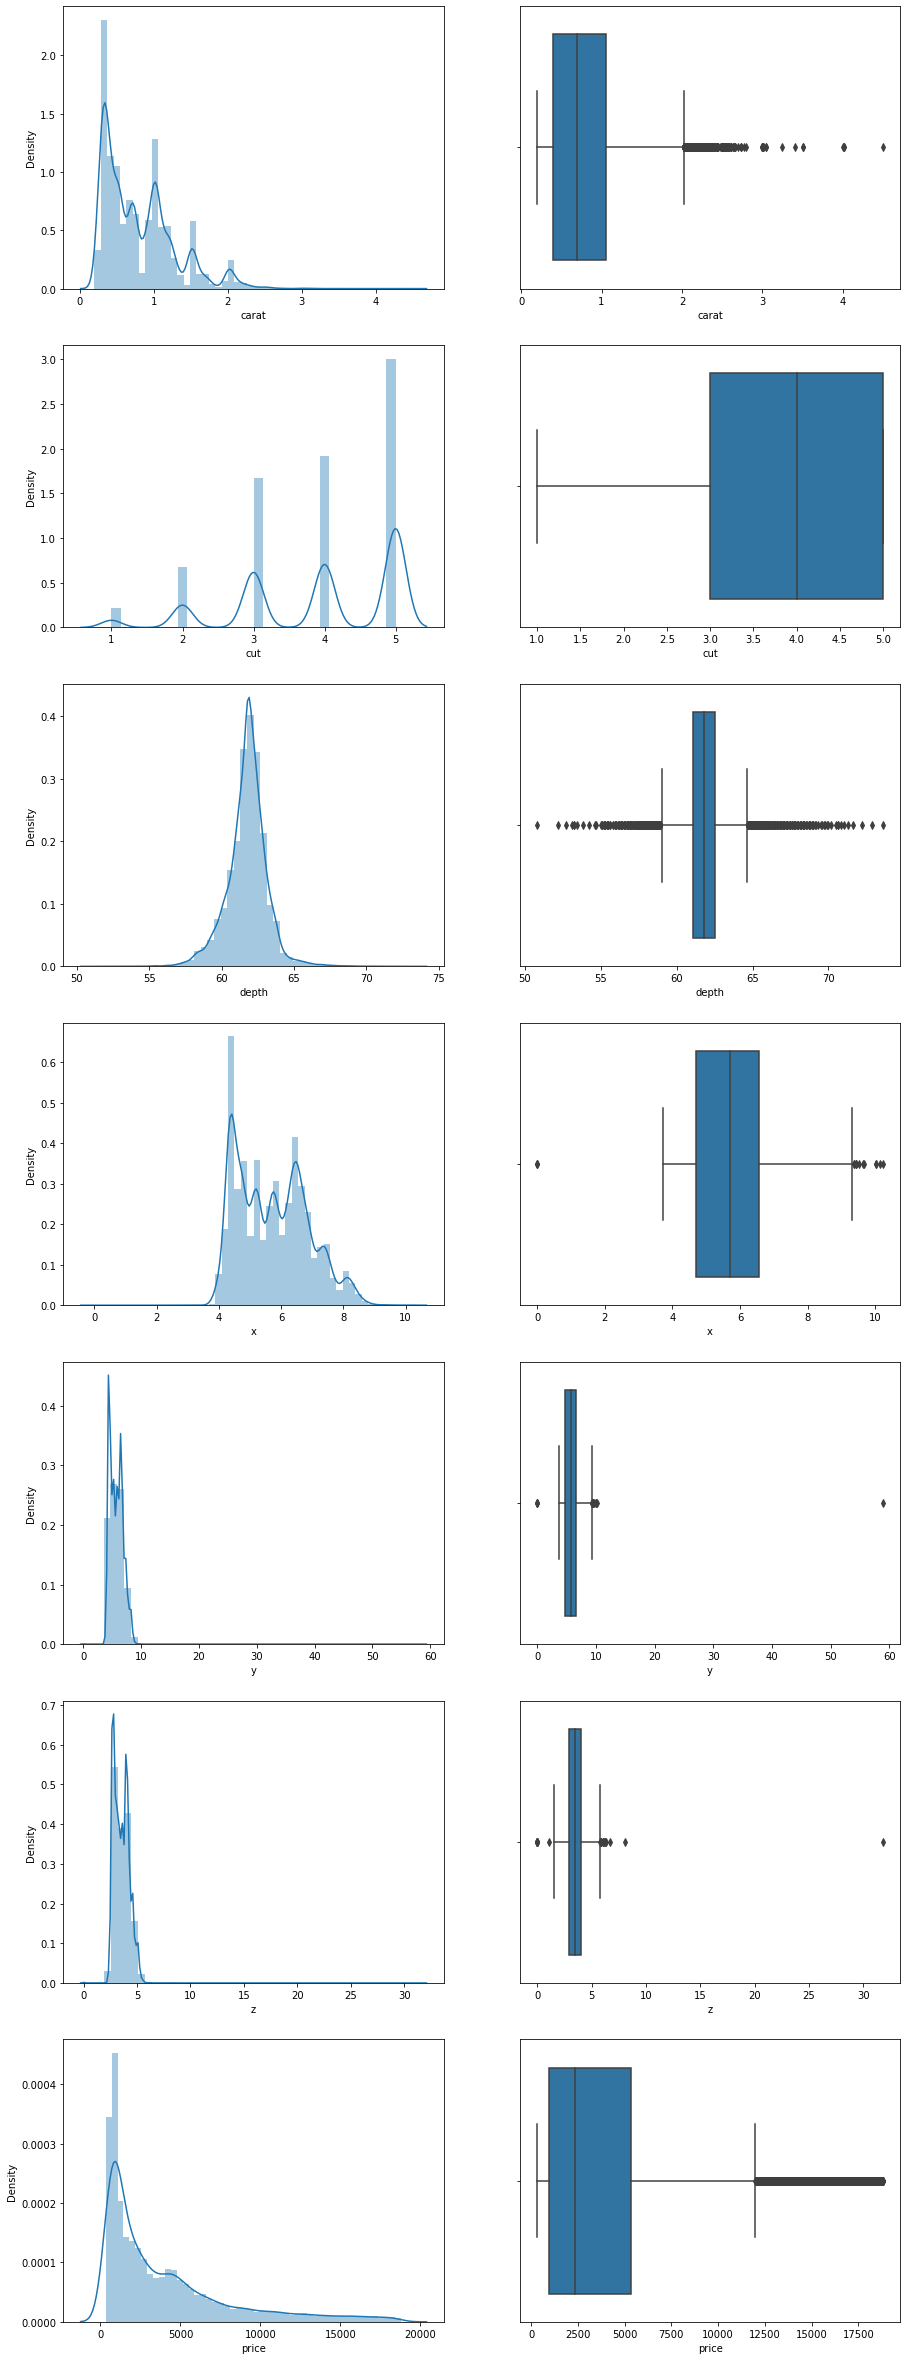

In [37]:
a = 1
plt.figure(figsize=(15, 80))
for i in df[
    [
        "carat",
        "cut",
        "color",
        "clarity",
        "depth",
        "x",
        "y",
        "z",
        "price",
    ]
]:
    if df[i].dtype != "object":
        plt.subplot(13, 2, a)
        sns.distplot(df[i])
        # plt.title("Histogram for:" + i)
        plt.subplot(13, 2, a + 1)
        sns.boxplot(df[i])
        # plt.title("Boxplot for:" + i)
        a += 2

In [39]:
df.shape

(26967, 10)

In [40]:
def remove_outlier(col):
    sorted(col)
    q1, q3 = np.quantile(col, [0.25, 0.75])
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    return ll, ul

In [44]:
for i in df[['carat', 'cut', 'depth', 'x', 'y', 'z',
       'price']]:
    if df[i].dtype != "object":
        ll, ul = remove_outlier(df[i])
        df[i] = np.where(df[i] > ul, ul, df[i])
        df[i] = np.where(df[i] < ll, ll, df[i])

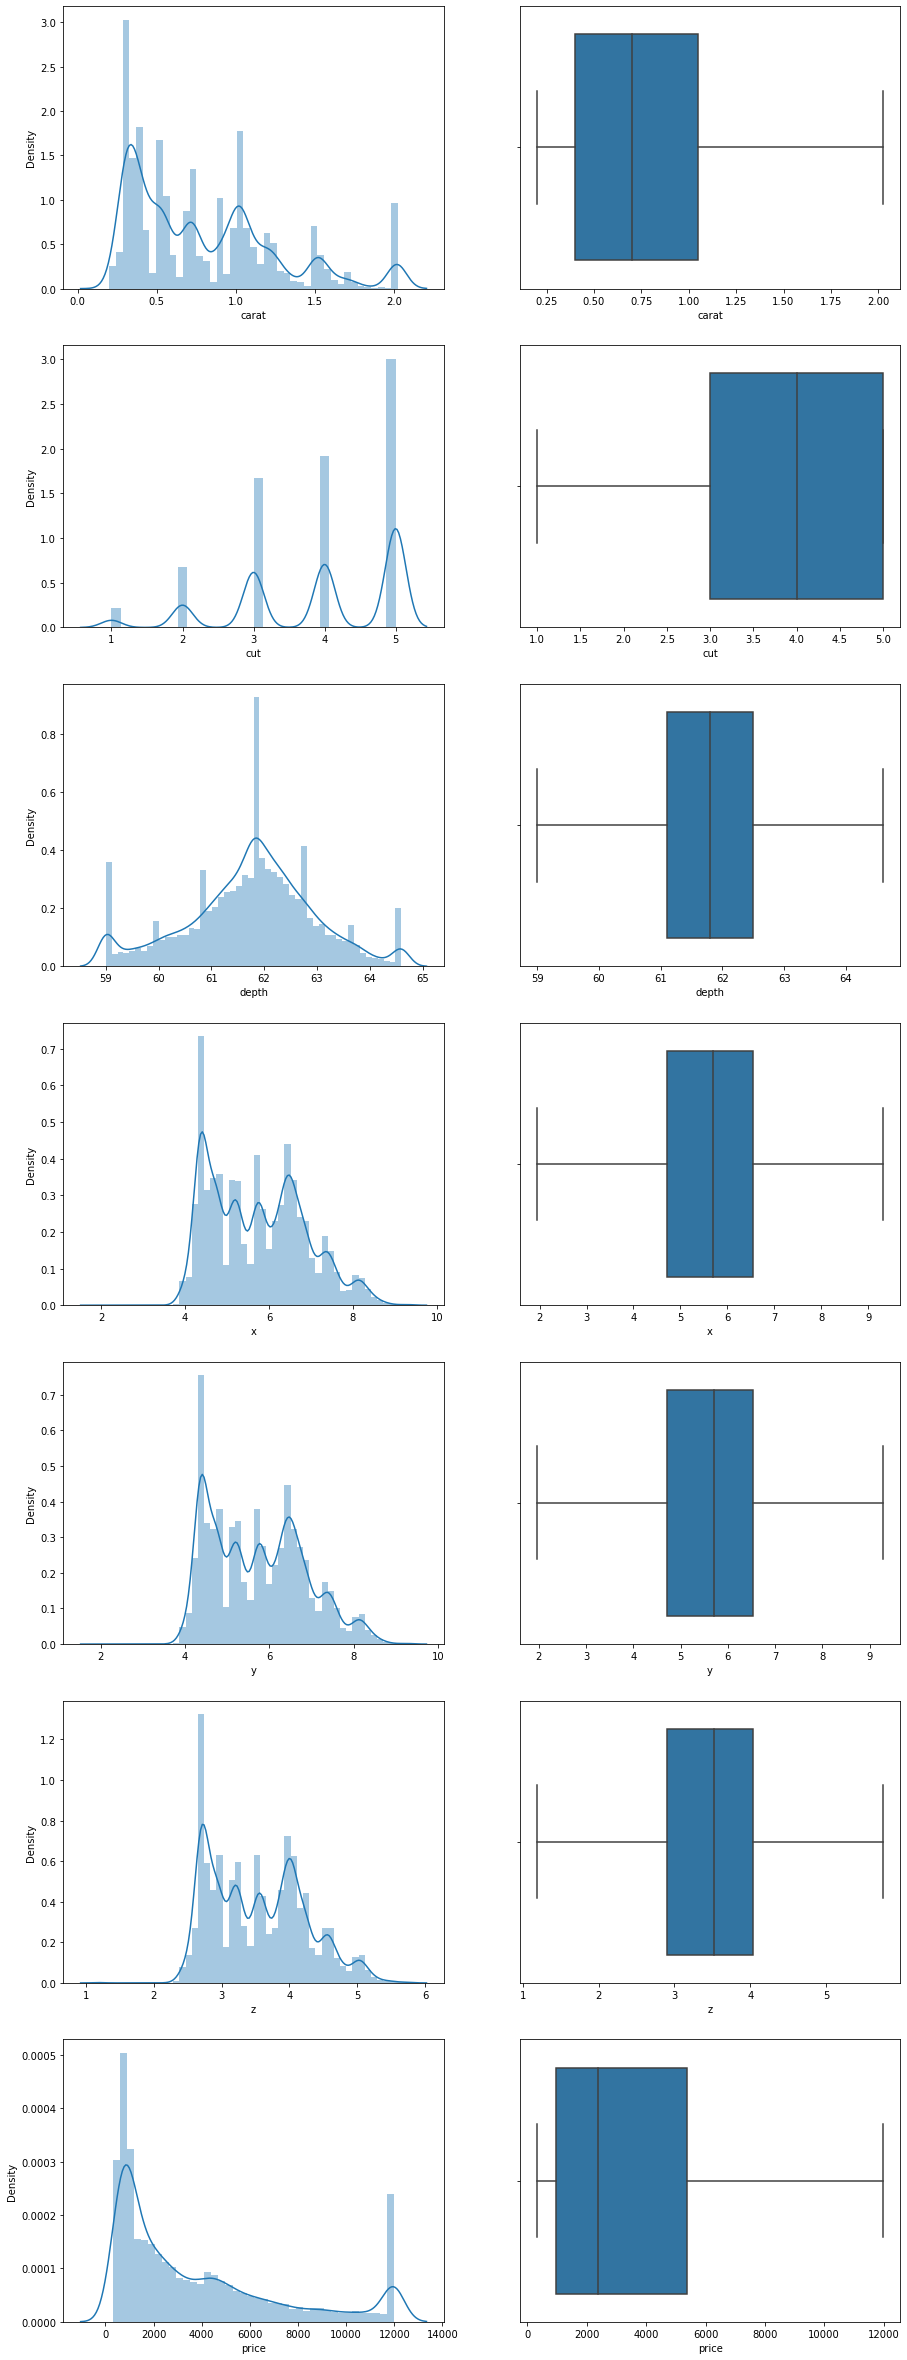

In [45]:
a = 1
plt.figure(figsize=(15, 80))
for i in df[
    [
        "carat",
        "cut",
        "color",
        "clarity",
        "depth",
        "x",
        "y",
        "z",
        "price",
    ]
]:
    if df[i].dtype != "object":
        plt.subplot(13, 2, a)
        sns.distplot(df[i])
        # plt.title("Histogram for:" + i)
        plt.subplot(13, 2, a + 1)
        sns.boxplot(df[i])
        # plt.title("Boxplot for:" + i)
        a += 2

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  float64
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.1+ MB


In [65]:
from sklearn import preprocessing

In [66]:
label_encoder = preprocessing.LabelEncoder()

In [69]:
df['color']= label_encoder.fit_transform(df['color'])

In [70]:
df['clarity']= label_encoder.fit_transform(df['clarity'])

In [71]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5.0,1,2,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,4.0,3,1,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,3.0,1,7,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,5.0,2,4,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,5.0,2,6,60.4,59.0,4.35,4.43,2.65,779.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  float64
 2   color    26967 non-null  int32  
 3   clarity  26967 non-null  int32  
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  float64
dtypes: float64(8), int32(2)
memory usage: 1.9 MB


In [73]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [74]:
import statsmodels.formula.api as SM

In [75]:
F_1 = 'price~carat+cut+color+clarity+depth+table+x+y+z'

In [76]:
model_1 = SM.ols(F_1,data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 3.058e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:25:16   Log-Likelihood:            -2.2552e+05
No. Observations:               26967   AIC:                         4.511e+05
Df Residuals:                   26957   BIC:                         4.511e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3400.6825    668.944      5.084      0.000    2089.518    4711.847
carat       9109.5278     76.317    119.365      0.000    8959.943    9259.112
cut          142.2309      7.002     20.312      0.000     128.506     155.956
color       -229.3457      3.884    -59.048      0.000    -236.959    -221.733
clarity      248.9832      3.789     65.705      0.000     241.556     256.411
depth        -40.7407      8.666     -4.701      0.000     -57.726     -23.755
table        -28.5761      3.620     -7.893      0.000     -35.672     -21.480
x          -2221.4816    109.948    -20.205      0.000   -2436.985   -2005.978
y           1794.0650    108.640     16.514      0.000    1581.124    2007.006
z           -339.6936     92.823     -3.660      0.000    -521.631    -157.756
==============================================================================
Omnibus:                     6873.925   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34904.645
Skew:                           1.142   Prob(JB):                         0.00
Kurtosis:                       8.084   Cond. No.                     9.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [80]:
vif_cal(input_data=df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']])

carat  VIF =  332.37
cut  VIF =  332.37
color  VIF =  332.37
clarity  VIF =  332.37
depth  VIF =  332.37
table  VIF =  332.37
x  VIF =  332.37
y  VIF =  332.37
z  VIF =  332.37


In [82]:
F_2 = 'price~carat+cut+color+clarity+depth+table+x+y'

In [83]:
model_2 = SM.ols(F_2,data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 3.438e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:45:33   Log-Likelihood:            -2.2552e+05
No. Observations:               26967   AIC:                         4.511e+05
Df Residuals:                   26958   BIC:                         4.511e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4726.9378    562.400      8.405      0.000    3624.604    5829.271
carat       9097.4775     76.263    119.291      0.000    8947.998    9246.957
cut          142.5153      7.004     20.349      0.000     128.788     156.243
color       -229.2520      3.885    -59.011      0.000    -236.867    -221.637
clarity      249.0021      3.790     65.695      0.000     241.573     256.431
depth        -62.9029      6.200    -10.145      0.000     -75.056     -50.750
table        -28.2312      3.620     -7.799      0.000     -35.326     -21.136
x          -2321.7428    106.504    -21.800      0.000   -2530.497   -2112.989
y           1689.9952    104.877     16.114      0.000    1484.432    1895.559
==============================================================================
Omnibus:                     6859.342   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34863.428
Skew:                           1.139   Prob(JB):                         0.00
Kurtosis:                       8.083   Cond. No.                     7.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
vif_cal(input_data=df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y']])

carat  VIF =  332.37
cut  VIF =  332.37
color  VIF =  332.37
clarity  VIF =  332.37
depth  VIF =  332.37
table  VIF =  332.37
x  VIF =  332.37
y  VIF =  332.37


In [93]:
F_3 = 'price~carat+cut+color+clarity+depth+table+x'

In [94]:
model_3 = SM.ols(F_3,data=df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 3.889e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:52:05   Log-Likelihood:            -2.2565e+05
No. Observations:               26967   AIC:                         4.513e+05
Df Residuals:                   26959   BIC:                         4.514e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6377.1529    555.644     11.477      0.000    5288.061    7466.245
carat       9189.6371     76.412    120.264      0.000    9039.865    9339.409
cut          130.7851      6.999     18.686      0.000     117.067     144.504
color       -229.6195      3.903    -58.825      0.000    -237.270    -221.969
clarity      251.5144      3.805     66.097      0.000     244.056     258.973
depth        -76.6499      6.171    -12.422      0.000     -88.745     -64.555
table        -37.8815      3.587    -10.561      0.000     -44.912     -30.851
x           -680.5466     31.296    -21.746      0.000    -741.888    -619.205
==============================================================================
Omnibus:                     6803.135   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36059.885
Skew:                           1.116   Prob(JB):                         0.00
Kurtosis:                       8.207   Cond. No.                     7.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
vif_cal(input_data=df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x']])

carat  VIF =  28.35
cut  VIF =  1.02
color  VIF =  1.08
clarity  VIF =  1.05
depth  VIF =  1.0
table  VIF =  1.04
x  VIF =  inf


In [96]:
F_4 = 'price~carat+cut+color+clarity+depth+table'

In [97]:
model_4 = SM.ols(F_4,data=df).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 4.451e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:52:30   Log-Likelihood:            -2.2589e+05
No. Observations:               26967   AIC:                         4.518e+05
Df Residuals:                   26960   BIC:                         4.518e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1709.2001    516.970      3.306      0.001     695.911    2722.489
carat       7560.0893     15.074    501.536      0.000    7530.544    7589.635
cut          132.8301      7.059     18.816      0.000     118.993     146.667
color       -224.9722      3.932    -57.223      0.000    -232.678    -217.266
clarity      260.3410      3.816     68.215      0.000     252.860     267.821
depth        -44.7768      6.046     -7.406      0.000     -56.628     -32.926
table        -37.1929      3.618    -10.279      0.000     -44.285     -30.101
==============================================================================
Omnibus:                     6197.158   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26696.504
Skew:                           1.071   Prob(JB):                         0.00
Kurtosis:                       7.378   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
vif_cal(input_data=df[['carat', 'cut', 'color', 'clarity', 'depth', 'table']])

carat  VIF =  1.19
cut  VIF =  1.51
color  VIF =  1.1
clarity  VIF =  1.06
depth  VIF =  1.33
table  VIF =  1.59


<AxesSubplot:>

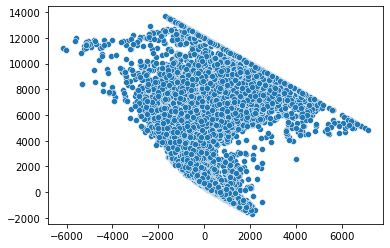

In [141]:
#Linear Relationship b/w Dependent and Independent Varaibles 

sns.scatterplot(model_4.resid,model_4.fittedvalues)

In [99]:
F_5 = 'price~carat+cut+color+clarity+depth'

In [100]:
model_5 = SM.ols(F_5,data=df).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 5.318e+04
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:53:04   Log-Likelihood:            -2.2594e+05
No. Observations:               26967   AIC:                         4.519e+05
Df Residuals:                   26961   BIC:                         4.519e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2292.2210    340.850     -6.725      0.000   -2960.306   -1624.136
carat       7538.3268     14.953    504.121      0.000    7509.017    7567.636
cut          171.3751      5.993     28.597      0.000     159.629     183.121
color       -224.7763      3.939    -57.063      0.000    -232.497    -217.056
clarity      261.0539      3.823     68.281      0.000     253.560     268.548
depth        -16.7966      5.409     -3.105      0.002     -27.399      -6.194
==============================================================================
Omnibus:                     6248.907   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26729.947
Skew:                           1.083   Prob(JB):                         0.00
Kurtosis:                       7.370   Cond. No.                     3.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
vif_cal(input_data=df[['carat', 'cut', 'color', 'clarity', 'depth']])

carat  VIF =  1.16
cut  VIF =  1.08
color  VIF =  1.1
clarity  VIF =  1.06
depth  VIF =  1.06


In [102]:
#Using the last best model 
model_4_pred = model_4.fittedvalues
model_4_pred

0          -0.742535
1        -558.845468
2        5492.492299
3        1298.952231
4         930.177771
            ...     
26962    5531.199993
26963    -588.663278
26964    2252.979827
26965     671.346255
26966    5928.128966
Length: 26967, dtype: float64

In [103]:
from sklearn.linear_model import LinearRegression

In [146]:
lr = LinearRegression()

In [105]:
from sklearn.model_selection import train_test_split

## Lets check base model performance-Model 1

In [127]:
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
Y = np.log(df['price'])

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [158]:
model_base = lr.fit(X_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']],Y_train)

In [159]:
#Training Data Prediction

model_base_train = model_base.predict(X_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']])

In [160]:
#Test Data Prediction

#Test Data Prediction

model_base_test = model_base.predict(X_test[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']])

In [113]:
from sklearn.metrics import mean_squared_error

In [132]:
RMSE_Train_base = np.round(np.sqrt(mean_squared_error(Y_train,model_base_train)),2)
RMSE_Test_base = np.round(np.sqrt(mean_squared_error(Y_test,model_base_test)),2)


print('Training Data RMSE of model_base:',RMSE_Train_base )
print('Test Data RMSE of model_base:',RMSE_Test_base)

Training Data RMSE of model_base: 0.22
Test Data RMSE of model_base: 0.23


## model performance of model 4

In [167]:
model_base = lr.fit(X_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table']],Y_train)

In [168]:
#Training Data Prediction

model_base_train = model_base.predict(X_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table']])

In [169]:
#Test Data Prediction

#Test Data Prediction

model_base_test = model_base.predict(X_test[['carat', 'cut', 'color', 'clarity', 'depth', 'table']])

In [170]:
RMSE_Train_base = np.round(np.sqrt(mean_squared_error(Y_train,model_base_train)),2)
RMSE_Test_base = np.round(np.sqrt(mean_squared_error(Y_test,model_base_test)),2)


print('Training Data RMSE of model_base:',RMSE_Train_base )
print('Test Data RMSE of model_base:',RMSE_Test_base)

Training Data RMSE of model_base: 0.35
Test Data RMSE of model_base: 0.35


In [171]:
resultDf_M4 = pd.DataFrame({'RMSE Training Data':[RMSE_Train_base],'RMSE Test Data':[RMSE_Test_base]},index=['Model_base'])
resultDf_M4

,RMSE Training Data,RMSE Test Data
Model_base,0.35,0.35


## Model performance of model 3

In [180]:
model_base = lr.fit(X_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x']],Y_train)

In [181]:
#Training Data Prediction

model_base_train = model_base.predict(X_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x']])

In [182]:
#Test Data Prediction

#Test Data Prediction

model_base_test = model_base.predict(X_test[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x']])

In [183]:
RMSE_Train_base = np.round(np.sqrt(mean_squared_error(Y_train,model_base_train)),2)
RMSE_Test_base = np.round(np.sqrt(mean_squared_error(Y_test,model_base_test)),2)


print('Training Data RMSE of model_base:',RMSE_Train_base )
print('Test Data RMSE of model_base:',RMSE_Test_base)

Training Data RMSE of model_base: 0.23
Test Data RMSE of model_base: 0.23


In [184]:
resultDf = pd.DataFrame({'RMSE Training Data':[RMSE_Train_base_3],'RMSE Test Data':[RMSE_Test_base_3]},index=['Model_base'])
resultDf

,RMSE Training Data,RMSE Test Data
Model_base,0.35,0.35


In [189]:
model_base = lr.fit(X_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y']],Y_train)

In [190]:
#Training Data Prediction

model_base_train = model_base.predict(X_train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y']])

In [191]:
#Test Data Prediction

model_base_test = model_base.predict(X_test[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y']])

In [192]:
RMSE_Train_base = np.round(np.sqrt(mean_squared_error(Y_train,model_base_train)),2)
RMSE_Test_base = np.round(np.sqrt(mean_squared_error(Y_test,model_base_test)),2)


print('Training Data RMSE of model_base:',RMSE_Train_base )
print('Test Data RMSE of model_base:',RMSE_Test_base)

Training Data RMSE of model_base: 0.23
Test Data RMSE of model_base: 0.23
